# ポアソン回帰手法

## 一般化線形モデル
一般化線形モデルとは，確率分布とリンク関数$g$を指定することで，線形回帰モデルを一般化したものです．

具体的に書き下すと線形表現を以下のように書き換えます．
$$
g(\mu) = \omega^T \phi(x_i)
$$
ここで，$\mu$は平均値，$\omega$はパラメータ，$\phi(x_i)$は基底関数です．

また，$Y_i$の従う分布を指数型分布族の正準系である特定の分布に限定することで，一般化線形モデルを構成します．

### ポアソン回帰モデル
ポアソン回帰モデルは，ポアソン分布を確率分布として指定した一般化線形モデルです．
$$
y_i|\lambda_i \sim Poisson(\lambda_i) \\
\lambda_i = g^{-1}(u_i) = \exp(u_i) = \exp(\omega^T \phi(x_i))
$$

### データ生成

$$
y_i|\lambda_i \sim Poisson(\lambda_i) \\
\lambda_i = g^{-1}(u_i) = \exp(u_i) = \exp(\beta x_i)
$$

In [36]:
# データ生成
import numpy as np
from scipy.stats import poisson

np.random.seed(123)

# サンプルサイズと説明変数の数を定義します。
n_samples = 300
n_features = 1

# 説明変数Xをランダムに生成します。それぞれの特徴量は標準正規分布から生成します。
X = np.random.normal(size=(n_samples, n_features))

# 真のパラメータbetaをランダムに生成します。
true_beta = np.random.normal(size=n_features)

# 線形の結合を計算します。
linear_combination = X @ true_beta

# exp関数を適用して、ポアソン分布の平均lambdaを得ます。
lam = np.exp(linear_combination)

# ポアソン分布からサンプリングを行い、応答変数Yを得ます。
Y = poisson.rvs(lam)

In [37]:
print(f"beta: {true_beta}")

beta: [0.76505485]


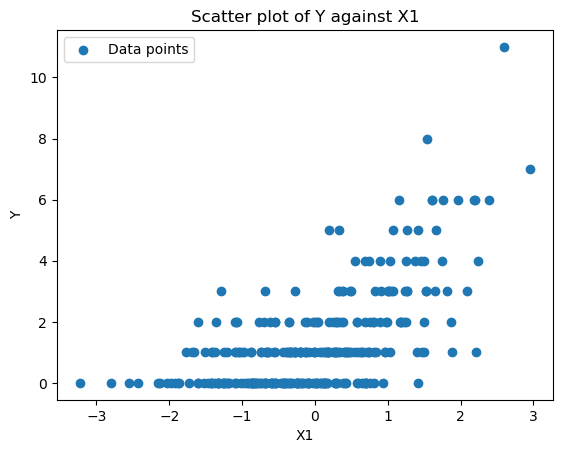

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# 最初の説明変数をX1として抽出します。
X1 = X[:, 0]

# 散布図をプロットします。
plt.scatter(X1, Y, label='Data points')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Scatter plot of Y against X1')
plt.legend()
plt.show()

それぞれの説明変数に対して，各$y$の確率を計算しましょう．
$\beta = 0.64$，$x = 2$として
$$
\lambda = \exp(\beta x) = \exp(0.64 \times 2) = 3.6 \\
p(y=0|\lambda) = \frac{\lambda^0 \exp(-\lambda)}{0!} = \exp(-\lambda) = \exp(-3.6) = 0.027 \\
p(y=1|\lambda) = \frac{\lambda^1 \exp(-\lambda)}{1!} = \lambda \exp(-\lambda) = 3.6 \exp(-3.6) = 0.098 \\
$$

In [39]:
print(np.exp(true_beta * 2))
print(np.exp(- 3.6) )
print(3.6 * np.exp( - 3.6))

[4.61868343]
0.02732372244729256
0.09836540081025322


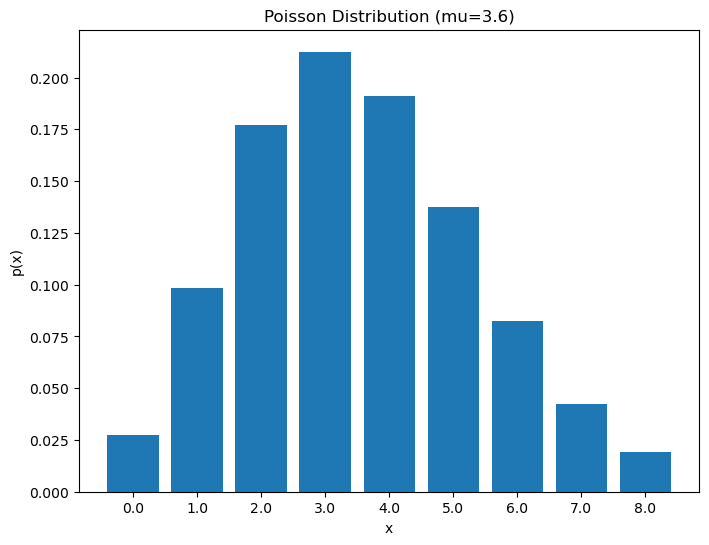

In [40]:
# 平均3.6のポアソン分布
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# パラメータを設定します。
mu = 3.6

# ポアソン分布の確率質量関数を計算するためのx値の範囲を定義します。
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

# 確率質量関数を計算します。
pmf = poisson.pmf(x, mu)

# 結果をプロットします。
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, tick_label=x)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Poisson Distribution (mu=3.6)')
plt.show()

対して$x=-2$のときにはポアソン分布は以下にようになります．
$$
\lambda = \exp(\beta x) = \exp(0.64 \times -2) = 0.27 \\
p(y=0|\lambda) = \frac{\lambda^0 \exp(-\lambda)}{0!} = \exp(-\lambda) = \exp(-0.27) = 0.76 \\
p(y=1|\lambda) = \frac{\lambda^1 \exp(-\lambda)}{1!} = \lambda \exp(-\lambda) = 0.27 \exp(-0.27) = 0.20 \\
$$

In [41]:
print(np.exp(true_beta * (-2)))
print(np.exp(- 0.27) )
print(0.27 * np.exp( - 0.27))

[0.21651192]
0.7633794943368531
0.20611246347095036


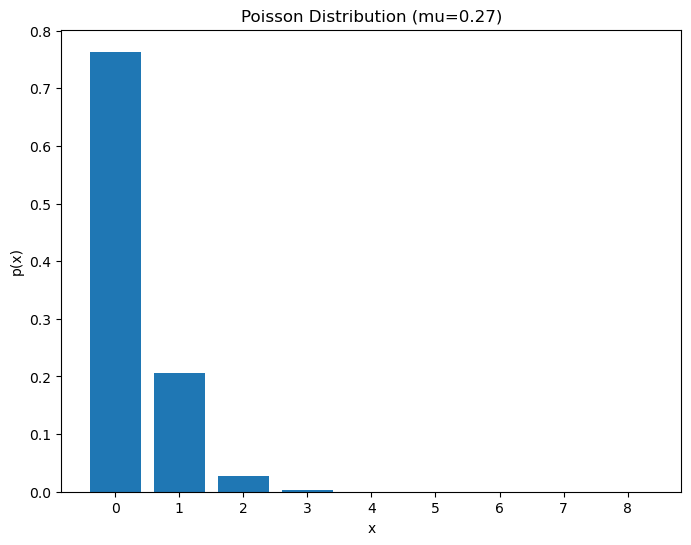

In [42]:
# 平均0.27のポアソン分布
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# パラメータを設定します。
mu = 0.27

# ポアソン分布の確率質量関数を計算するためのx値の範囲を定義します。
x = np.arange(0, 9) 

# 確率質量関数を計算します。
pmf = poisson.pmf(x, mu)

# 結果をプロットします。
plt.figure(figsize=(8, 6))
plt.bar(x, pmf, tick_label=x)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Poisson Distribution (mu=0.27)')
plt.show()

### ポアソン回帰

ポアソン回帰モデルにおける対数尤度関数は以下のようになる
$$
\log p(y|\lambda) = \sum_{i=1}^N \log \frac{\lambda_i^{y_i} \exp(-\lambda_i)}{y_i!} \\
= \sum_{i=1}^N \log \frac{\lambda_i^{y_i}}{y_i!} - \sum_{i=1}^N \lambda_i \\
= \sum_{i=1}^N y_i \log \lambda_i - \sum_{i=1}^N \lambda_i - \sum_{i=1}^N \log y_i! \\
= \sum_{i=1}^N y_i \log \lambda_i - \sum_{i=1}^N \exp(\omega^T \phi(x_i)) - \sum_{i=1}^N \log y_i!
$$

また，パラメータの偏微分は
$$
\frac{\partial \log L}{\partial \beta_0} = \sum_{i=1}^n \left( y_i - \lambda_i \right)
$$
$$
\frac{\partial \log L}{\partial \beta_1} = \sum_{i=1}^n \left( y_i - \lambda_i \right) x_i
$$

In [32]:
import statsmodels.api as sm

# 説明変数に定数項（切片）を加えます。
X = sm.add_constant(X)

# ポアソン回帰モデルを定義します。
model = sm.GLM(Y, X, family=sm.families.Poisson())

# モデルをフィット（推定）します。
results = model.fit()

# 推定結果を出力します。
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  300
Model:                            GLM   Df Residuals:                      298
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.08
Date:                Fri, 21 Jul 2023   Deviance:                       331.12
Time:                        15:35:54   Pearson chi2:                     316.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5468
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0179      0.063     -0.282      0.7


出力された結果から順番に説明していきます。

1.Dep. Variable（依存変数）: これは予測を行いたい目標変数を指します。ここでは、yがそれに該当します。

2.No. Observations（観測値の数）: データセット内の観測値（行）の数です。ここでは300となっています。

3.Df Residuals & Df Model（残差自由度 & モデル自由度）: 残差自由度は観測値の数から推定されたパラメータ数を引いたもので、ここでは298です。モデル自由度は使用した説明変数の数で、ここでは1となっています。

4.Model Family（モデルファミリー） & Link Function（リンク関数）: これはモデルが属する分布（ここではポアソン分布）と、リンク関数（ここでは対数関数）を示します。

5.Method（方法）: パラメータ推定に使用されたアルゴリズムを示します。ここではIRLS（Iteratively Reweighted Least Squares、反復再重み付け最小二乗法）が使用されています。

6.Date & Time（日付 & 時間）: モデルのフィットが実行された日付と時間を示します。

7.No. Iterations（反復回数）: パラメータの最尤推定に要した反復回数です。ここでは5回となっています。

8.Pseudo R-squ. (CS)（擬似R二乗（CS））: モデルの適合度を示す指標です。ここでは0.5468となっています。これは、モデルが全体のバリエーションの54.68%を説明できていることを意味します。

9.Covariance Type（共分散タイプ）: 共分散の推定に使用された方法を示します。ここではnonrobust（非ロバスト）が指定されています。

パラメータの詳細:

1.const（定数項）: モデルの切片を示します。推定値は-0.0179で、これは説明変数が全て0のときの予測される応答変数の対数平均値です。しかし、p値が0.778と大きいため、このパラメータが0と有意に異なるとは言えません。

2.x1（説明変数）: モデルのスロープを示し、説明変数が一単位増加したときの応答変数の対数期待値の変化量を示します。推定値は0.7598で、p値が0.000なので、このパラメータは0と有意に異なります。つまり、x1が一単位増えると、応答変数の対数期待値は0.7598だけ増加すると予測されます。

## ベイズポアソン回帰
上のポアソン回帰モデルに事前分布を導入したものがベイズポアソン回帰です．

手始めに，事前分布として正規分布を導入します．

In [53]:
import pymc3 as pm

# モデルの定義
model = pm.Model()
with model:
    # 事前分布を正規分布とする
    beta = pm.Normal('beta', mu=0, sd=1, shape=n_features)
    
    # 線形の結合
    mu = pm.math.dot(X, beta)
    
    # ポアソン分布のパラメータ（平均）を指定
    lam = pm.math.exp(mu)
    
    # ポアソン分布に従う観測データY
    Y_obs = pm.Poisson('Y_obs', mu=lam, observed=Y)

# モデルの学習
with model:
    trace = pm.sample(2000, tune=1000, cores=1)  # 2000はサンプリング回数, 1000はチューニングステップ数, coresは使用するCPUコア数


/tmp/ipykernel_1283486/775641376.py:20: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=1000, cores=1)  # 2000はサンプリング回数, 1000はチューニングステップ数, coresは使用するCPUコア数
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


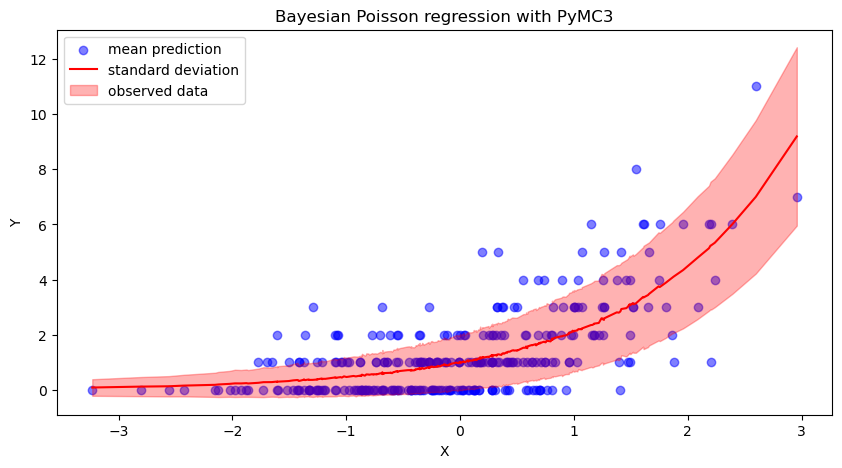

In [56]:
with model:
    ppc = pm.sample_posterior_predictive(trace, var_names=['Y_obs'])

ppc_Y_mean = np.mean(ppc['Y_obs'], axis=0)
ppc_Y_std = np.std(ppc['Y_obs'], axis=0)

plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='blue', alpha=0.5)
plt.plot(X[np.argsort(X[:, 0])], ppc_Y_mean[np.argsort(X[:, 0])], color='red')
plt.fill_between(
    X.flatten()[np.argsort(X[:, 0])], 
    ppc_Y_mean[np.argsort(X[:, 0])] - ppc_Y_std[np.argsort(X[:, 0])], 
    ppc_Y_mean[np.argsort(X[:, 0])] + ppc_Y_std[np.argsort(X[:, 0])], 
    color='red', alpha=0.3
)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Poisson regression with PyMC3')
plt.legend(['mean prediction', 'standard deviation', 'observed data'])
plt.show()

## 文献[57,11章]
『データ解析のための統計モデリング入門』（久保）

url:https://www.iwanami.co.jp/book/b257893.html

## ガウス過程ポアソン回帰
参考url:https://statmodeling.hatenablog.com/entry/how-to-use-GPy

事前分布にガウス過程を導入したものがガウス過程ポアソン回帰です．

生成モデルを以下に書くと
$$
y_i|\lambda_i \sim Poisson(\lambda_i) \\
\lambda_i = g^{-1}(u_i) = \exp(u_i) = \exp(f(x_i)) \\
f(x_i) \sim GP(0, k(x, x'))
$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X = np.arange(0, 50).reshape(-1, 1)
Y = np.array([0,3,2,5,6,16,8,1,11,10,17,19,14,19,19,18,15,13,13,9,11,15,18,12\
              ,11,17,14,16,15,9,6,15,10,11,14,7,14,14,13,17,8,7,10,4,5,5,7,4,3,1])

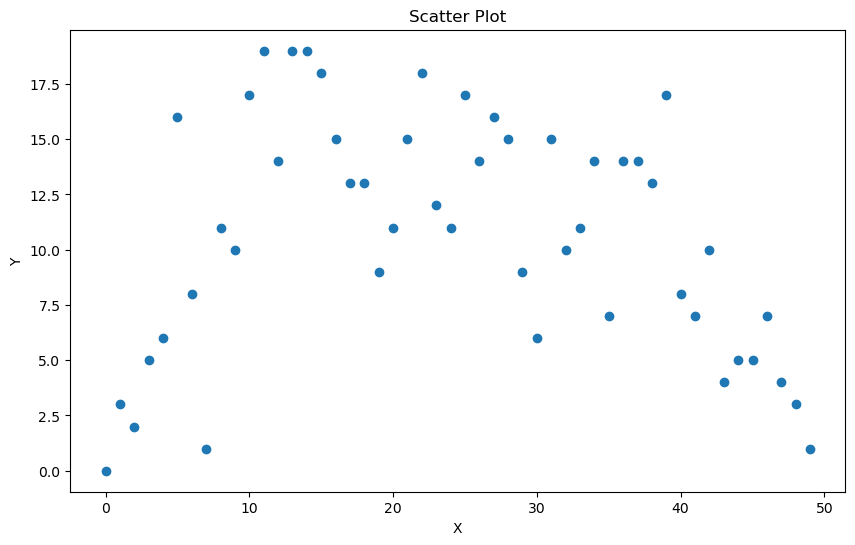

In [10]:
plt.figure(figsize=(10, 6))  # 幅10インチ、高さ6インチの図を作成
# 散布図を作成
plt.scatter(X, Y)

# グラフのタイトルと軸ラベルを設定
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')

# グラフを表示
plt.show()

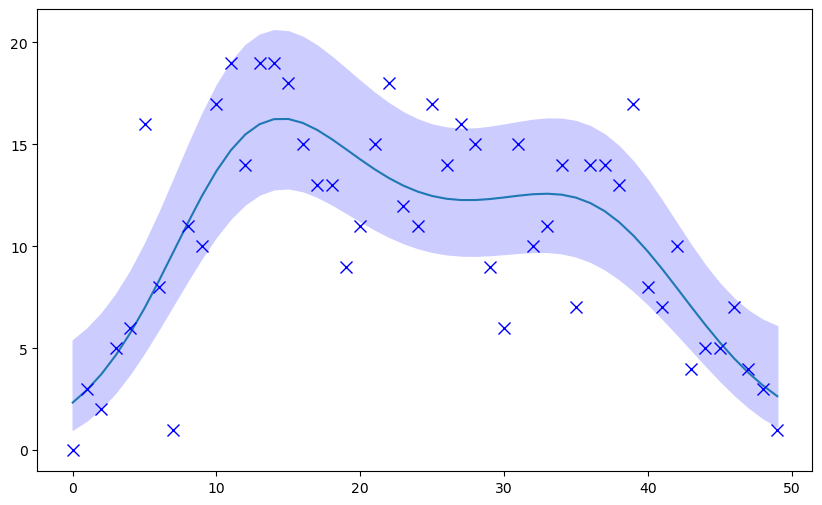

In [14]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, sqrt

def gpr_poisson(X, Y):
    N = len(Y)
    model = GPy.core.GP(X=X, Y=Y[:,None],
                        kernel=GPy.kern.RBF(1),
                        inference_method=GPy.inference.latent_function_inference.Laplace(),
                        likelihood=GPy.likelihoods.Poisson())
    model.optimize()
    mu, var = model._raw_predict(X)
    plt.plot(X, np.exp(mu))
    plt.fill_between(X[:,0], exp(mu[:,0] + 3*sqrt(var[:,0])),
                     exp(mu[:,0] - 3*sqrt(var[:,0])),
                     color='#ccccff')
    plt.plot(X, Y, 'xb', markersize=8)
    plt.show()

X = np.arange(0, 50).reshape(-1, 1)
Y = np.array([0,3,2,5,6,16,8,1,11,10,17,19,14,19,19,18,15,13,13,9,11,15,18,12\
              ,11,17,14,16,15,9,6,15,10,11,14,7,14,14,13,17,8,7,10,4,5,5,7,4,3,1])

plt.figure(figsize=(10, 6))  # 幅10インチ、高さ6インチの図を作成
gpr_poisson(X, Y)

## 参考:パラメータに関するポアソン分布のラプラス近似
$$
P(y|f) = \dfrac{\exp{(fy-e^f)}}{y!}
$$

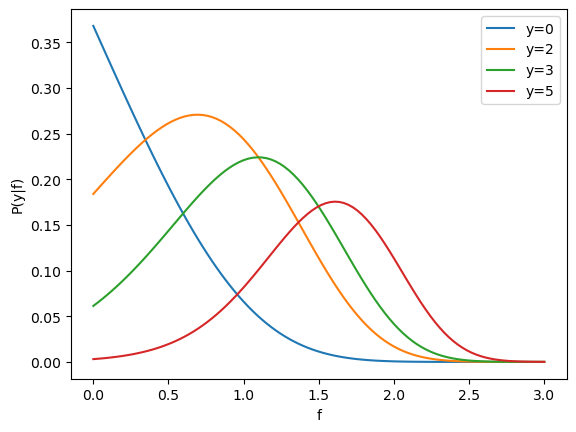

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# define the range of the parameter f
f_values = np.linspace(0, 3, 100)

# list of y values
y_values = [0,2, 3, 5]

# for each y, compute P(y|f) and plot
for y in y_values:
    P = np.exp(f_values*y - np.exp(f_values)) / factorial(y)
    plt.plot(f_values, P, label=f'y={y}')

plt.xlabel('f')
plt.ylabel('P(y|f)')
plt.legend()
plt.show()

$$
P(y|f) = \sqrt{\frac{y}{2\pi}}\exp{\left\{-\frac{y(f-\ln{y})^2}{2}\right\}}
$$

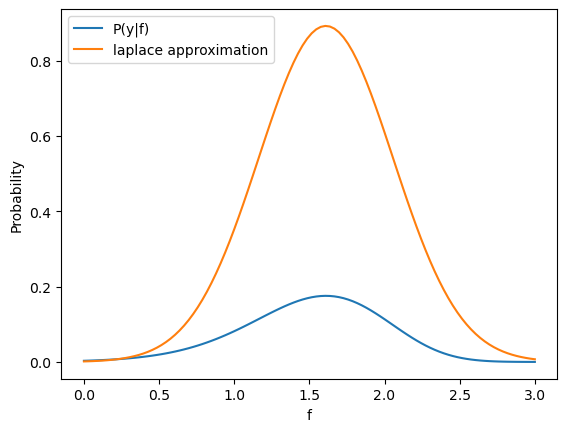

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# define the range of the parameter f
f_values = np.linspace(0, 3, 100)

# y value is fixed at 5
y = 5

# compute P(y|f) for all f
P_y_f = np.exp(f_values*y - np.exp(f_values)) / factorial(y)

# compute P(f|y) for all f
P_f_y = np.sqrt(y/(2*np.pi)) * np.exp(-y * (f_values - np.log(y))**2 / 2)

# plot the functions
plt.plot(f_values, P_y_f, label='P(y|f)')
plt.plot(f_values, P_f_y, label='laplace approximation')
plt.xlabel('f')
plt.ylabel('Probability')
plt.legend()
plt.show()